## importing necessary libaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


## Loading dataset of experience and salary

In [3]:
df = pd.read_csv("Experience-Salary.csv")
print(".....loading the dataset......")
df.head()

.....loading the dataset......


,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


## Data preprocessing

In [10]:
# before preprocessing creating backup df
df_back_up = df.copy()

In [6]:
# checking info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [7]:
df.describe()

,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


In [8]:
# checking for missing values
print("\n Missing values :")
print(df.isnull().sum())


 Missing values :
exp(in months)          0
salary(in thousands)    0
dtype: int64


In [9]:
# displaying the columns of df
df.columns

Index(['exp(in months)', 'salary(in thousands)'], dtype='object')

In [4]:
# changing the column names
df = df.rename(columns={'exp(in months)':'Experience','salary(in thousands)':'Salary'})
df.columns

Index(['Experience', 'Salary'], dtype='object')

C:\Users\user\AppData\Local\Temp\ipykernel_19536\219085994.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df,


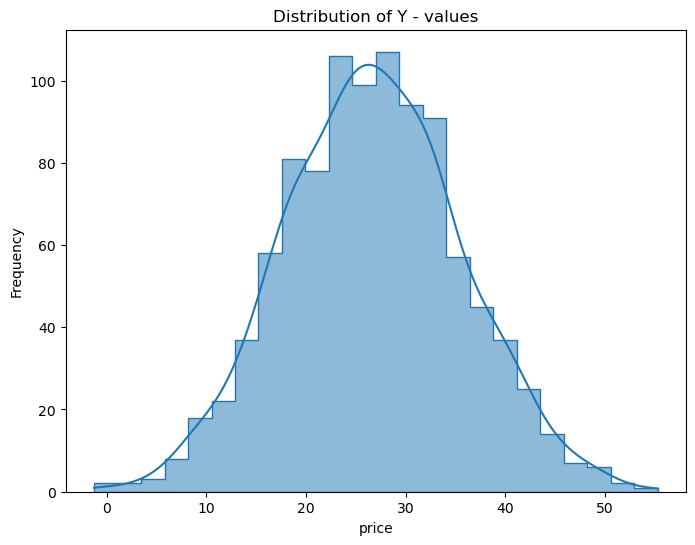

In [8]:
# distribution of price as our dependent value(salary)

plt.figure(figsize=(8, 6))
sns.histplot(data = df,
            x = 'Salary',
            element = 'step',
            kde = True,
            palette ='tab10')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of Y - values')
plt.show()


according to above plot shows that salary is normally distributed

C:\Users\user\AppData\Local\Temp\ipykernel_19536\3670705319.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df,


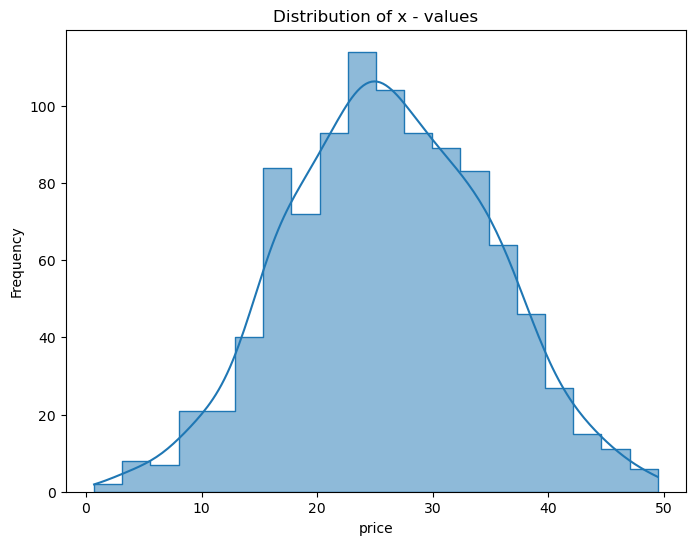

In [9]:
# distribution of price as our dependent value(experience)

plt.figure(figsize=(8, 6))
sns.histplot(data = df,
            x = 'Experience',
            element = 'step',
            kde = True,
            palette ='tab10')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of x - values')
plt.show()


## Model building

Standardization will ensure that feature  contribute equally (even if it is normally distributed) to the model training process.
it is crucial when we have multivariables regression

In [35]:
# separating the dataset into x and y feature
from sklearn.preprocessing import StandardScaler

x = df[['Experience']] # convert into 2D
y = df['Salary']

# standardization of data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


x_train,x_test , y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                   test_size =0.2,
                                                   random_state = 0)

In [32]:
x_train.shape, x.shape

((800, 1), (1000, 1))

In [21]:
len(X_train)/len(x) * 100

80.0

In [33]:
# initializing the linear regression model
model = LinearRegression()

# train the model on the training data
model.fit(x_train, y_train)

# make predictions on the test data
y_preds = model.predict(x_test)

# evaluate the model using (MSE) and R2square
mse = mean_squared_error(y_test,y_preds)
r2 = r2_score(y_test, y_preds)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 22.403352623845734
R-squared (R2) Score: 0.7461884708900269


the Mean Squared Error (MSE) of 22.40 indicates that, on average, **the squared difference between the predicted salaries and the actual salaries is relatively low**. This suggests that the model’s predictions are reasonably close to the true values

The R-squared (R²) score of 0.746 means that approximately 74.6% of the variability in salary can be explained by years of work experience using the linear regression model. **This represents a good model fit for a simple linear regression problem with a single predictor**.

## Model Refinement Techniques

Model refinement aims to improve prediction accuracy, reduce error, and increase generalization performance
## 1. Cross-Validation
Instead of relying on one split, use k-fold cross-validation:

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X_scaled, y, cv=3, scoring='r2')

print("Average R² Score:", scores.mean())


Average R² Score: 0.6553087581820871


Before model refinement, the R² score was 0.746, meaning the model explained about 74.6% of the variation in salary based on years of experience. After applying cross validation techniques, the R² score decreased to 0.654, indicating that the model now explains 65.4% of the variation
but overall doesn't improve our model

## 2. Hyperparameter Tuning
Technique
Prevent overfitting and improve generalization
Use GridSearchCV to find the best regularization strength:

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV
grid = GridSearchCV(Ridge(), params, cv=5)
grid.fit(x_train, y_train)

# finding the Best alpha
best_alpha = grid.best_params_['alpha']
print("Best alpha:", best_alpha)

# Train Ridge with best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(x_train, y_train)

# Predictions on test set
y_pred = ridge_best.predict(x_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

print("Mean Squared Error (RMSE):",mean_squared_error(y_test, y_pred))

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2)


Best alpha: 1
Root Mean Squared Error (RMSE): 4.7340737888612106
Mean Squared Error (RMSE): 22.41145463838274
R-squared (R²) Score: 0.7460966817398478


### Commentary

After applying **Ridge Regression with GridSearchCV**, the metrics changed very slightly:

- **RMSE** increased slightly from **22.403 → 22.411**
- **R²** decreased slightly from **0.7462 → 0.7461**

This indicates that **regularization had minimal effect**, which is expected because:

- The dataset likely has **only one feature (Experience)**
- There is **no overfitting issue** to correct

The model is already performing well, and Ridge just slightly adjusted the coefficients for **better generalization**.
